In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean

Read some data, In this case we are using the progrss output of a Reinforcment Learning algorithm<br><br>
***TODO***: briefly explain what the column mean, then drop the ones that are not used

In [13]:
df = pd.read_csv('C:\\Users\\darenas\\home\\output.csv')  #TODO: put the final file on the repo
# Thread ; Step ; Reward ; Qmax ; Epsilon ; EpsilonProg
df.head()

,Thread,Step,Reward,Qmax,Epsilon,EpsilonProg
0,T0,690,310,0.092156,0.998448,0.001725
1,T2,564,210,0.102122,0.998731,0.001410
2,T1,688,210,0.093503,0.998452,0.001720
3,T4,610,180,0.092138,0.999238,0.001525
4,T5,571,170,0.087198,0.998715,0.001427


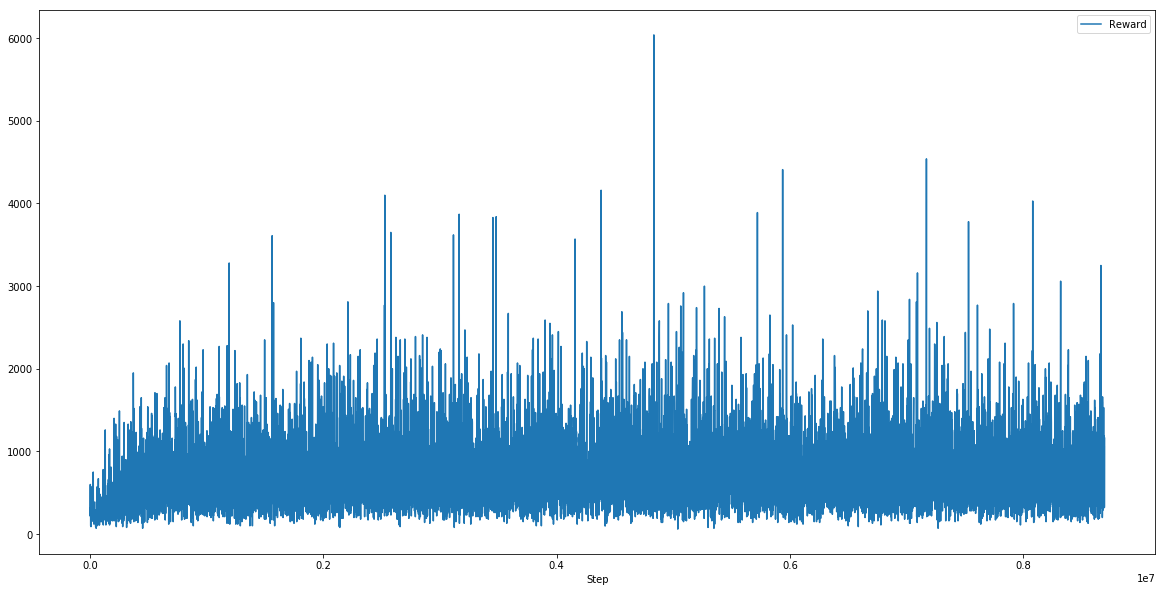

In [14]:
#x = df['Step']
y1 = df[df['Thread'].str.match('T0')]
y1.plot(x='Step', y= 'Reward', figsize=(20,10))

As we can see, the data is quite noisy and the peak widths vary from broad to narrow. It is very difficult to observer the progress of the algorithms in such way. Therfore we will apply a simple smoothing ot filtering operation: **The Moving Average Filtering**<br><br>
***TODO***: add simple explanation here, the the moment here is the [wikipedia entry](https://en.wikipedia.org/wiki/Moving_average)<br><br>
In this case we will use the geometric mean as it is less sensitive to outliers, feel free to change the *useGeometricMean* variable to observe the differences in the graph with respect to the arithmetic mean (average). Hint: observe the max value of the curves

In [15]:
useGeometricMean = True

In [16]:
groupedDF = df.groupby('Thread')
#for key, item in groupedDF:
#    print(groupedDF.get_group(key), "\n\n")
tdf = groupedDF['Reward'].rolling(window = 300, min_periods = 1, center = True)
if useGeometricMean:
    tdf = tdf.apply(gmean, raw=True)
else:
    tdf = tdf.mean()
tdf = tdf.round().rename('filt_Rew').to_frame().reset_index()

In [17]:
tdf = tdf.drop(columns=['Thread'])
ndf = df.merge(tdf, left_index = True, right_on='level_1')
ndf = ndf.set_index('level_1')
del ndf.index.name

It may be a good idea to wrap the code that generates the plot into a function that we can call afterwards to show other trends on the same data:

In [18]:
def plotMyDataset(the_dataset, grouping_by, the_column):     
    grpd = the_dataset.groupby(grouping_by)
    plt.figure(figsize=(20,10))
    for name, data in grpd:
        line = plt.plot(data.Step.values, data.get(the_column).values, label = name)
        plt.setp(line, linewidth=3)
    plt.legend()
    #TODO: Add the axis names

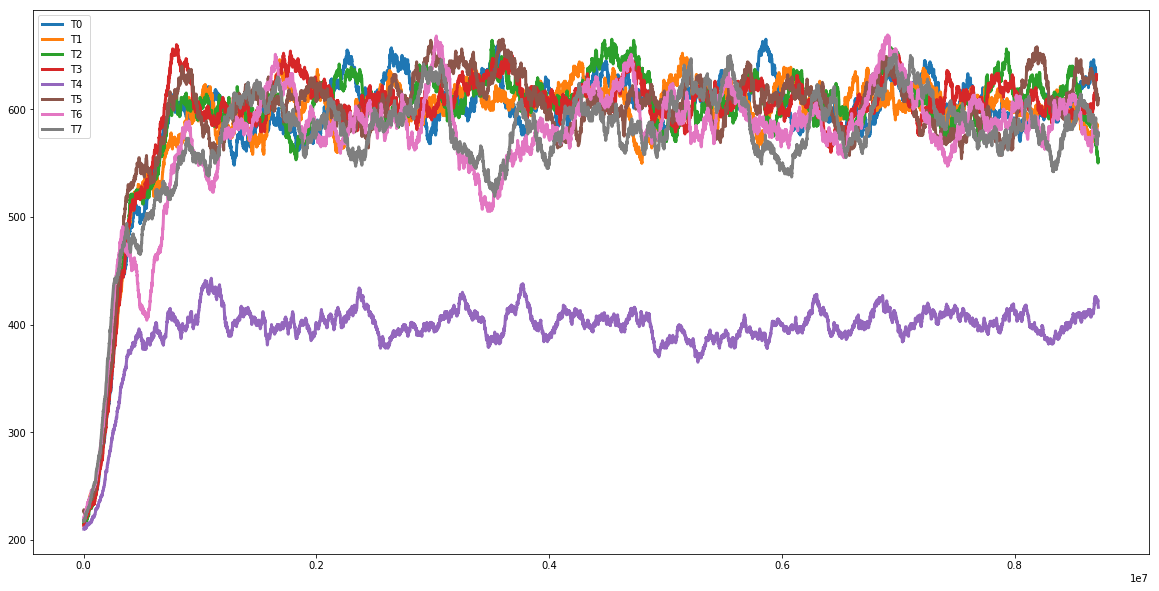

In [19]:
plotMyDataset(ndf, 'Thread', 'filt_Rew')

Another intersting curve to observe may be the one reporting the Qmax values<br><br> 
***TODO:*** Perhaps here use another method for doing the filtering, for instance using directly the series?

In [20]:
tdf = groupedDF['Qmax'].rolling(window = 100, min_periods = 1, center = True)
if useGeometricMean:
    tdf = tdf.apply(gmean, raw=True)
else:
    tdf = tdf.mean()
tdf = tdf.rename('filt_Qmax').to_frame().reset_index()
tdf = tdf.drop(columns=['Thread'])
ndf = ndf.merge(tdf, left_index = True, right_on='level_1')
ndf = ndf.set_index('level_1')
del ndf.index.name

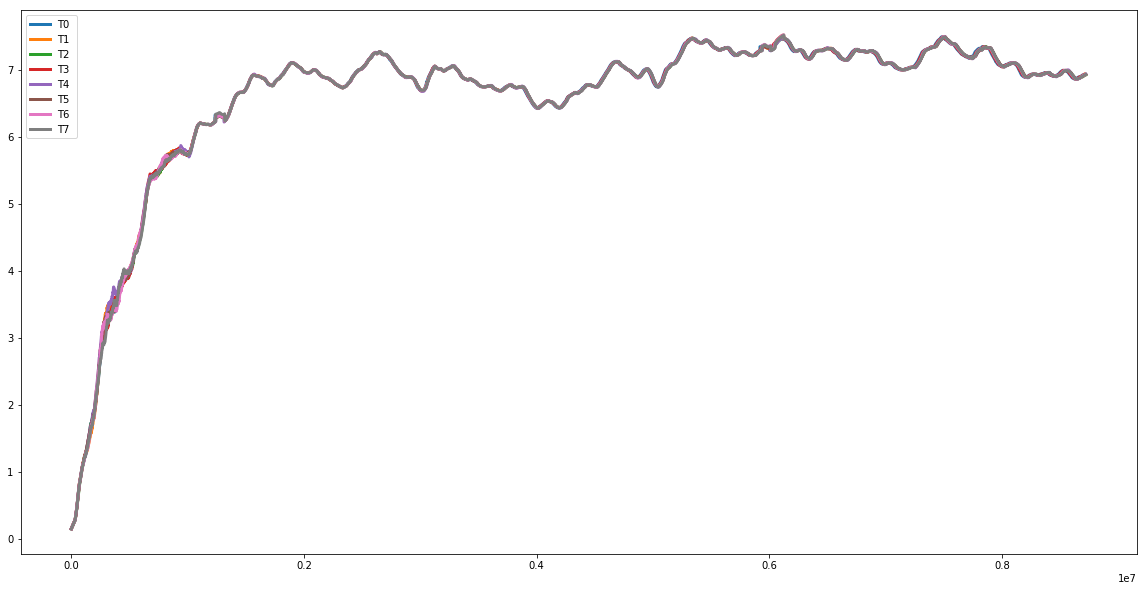

In [21]:
plotMyDataset(ndf, 'Thread', 'filt_Qmax')